In [29]:
import pymrio  
from pymrio.core.constants import PYMRIO_PATH
import os  
import warnings
import matplotlib.pyplot as plt  
import numpy as np  
import seaborn as sns  
from pathlib import Path
import plotly.graph_objects as go 

In [30]:
warnings.simplefilter(action='ignore', category=FutureWarning)  
eora_path = 'C:/Users/megan/mz_codes/Eora26_2022_bp'  
eora26 = pymrio.parse_eora26(eora_path, year=2022)  
  
x_array = np.array(eora26.x)  
if np.any(x_array == 0):  
   mean_value = np.nanmean(x_array[x_array != 0])  
   x_array[x_array == 0] = mean_value  
   eora26.x = x_array  
  
eora26.calc_all()  
eora26.calc_extensions()

C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1962: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=0, inplace=True)
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True

In [ ]:
regions = eora26.A.index.get_level_values(0).unique()  
sectors = eora26.A.index.get_level_values(1).unique()  
io_table = eora26.A  
fd_table = eora26.Y  
emissions = eora26.Q.F
leontief_inverse = eora26.L 
print(list(eora26.get_extensions()))
print(emissions)
print("Done at this step.") 

['Q', 'VA']
region                                                                                      AFG  \
sector                                                                              Agriculture   
stressor                         source                                                           
Energy Usage                     Natural Gas                                            14.5665   
                                 Coal                                                   11.8107   
                                 Petroleum                                               0.0000   
                                 Nuclear Electricity                                     0.0000   
                                 Hydroelectric Electricity                               0.0000   
...                                                                                         ...   
IEA GHG emissions and energy use IEA - DEPRECATED - GDP using purchasing power p...      0.0000  

C:\Users\megan\AppData\Local\Temp\ipykernel_30584\2915169899.py:7: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(io_table_values), vmin=np.log10(np.min(io_table)), vmax=np.log10(vmax), cmap='viridis')


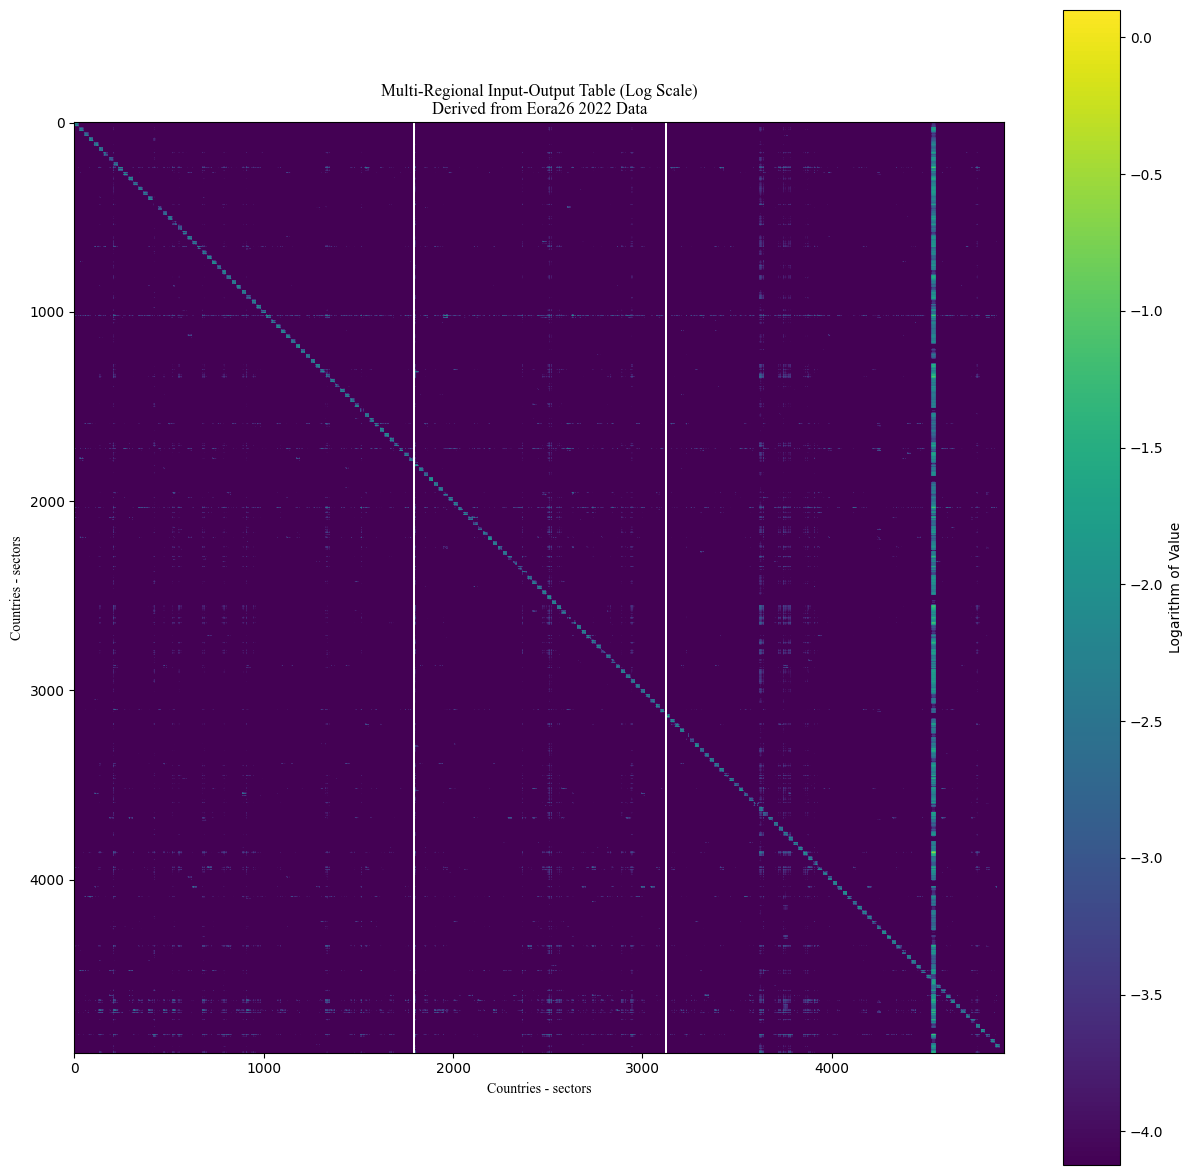

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(15, 15))  
io_table_values = io_table.values
vmax = np.percentile(io_table_values[~np.isnan(io_table_values)], 95)  # Reduce outliers' impact
vmin = np.min(io_table_values[~np.isnan(io_table_values)]) 
  
io_table_values[io_table_values == 0] = 1e-10  
plt.imshow(np.log10(io_table_values), vmin=np.log10(np.min(io_table)), vmax=np.log10(vmax), cmap='viridis')  
plt.xlabel("Countries - sectors", fontname = 'Times New Roman')  
plt.ylabel("Countries - sectors", fontname='Times New Roman')  
plt.title("Multi-Regional Input-Output Table (Log Scale)\nDerived from Eora26 2022 Data", fontname='Times New Roman')  
plt.colorbar(label='Logarithm of Value') 
plt.show()
plt.savefig("iotable_heatmap.png", bbox_inches='tight')  

In [ ]:
et1_diag = eora26.Q.diag_stressor(('Energy Usage', 'Natural Gas'), name = "emtype1_diag")
# et1_diag.F.head(15)
eora26.et1_diag = et1_diag
eora26.calc_all()
eora26.et1_diag.D_cba.head(20)

region                                                            AFG  \
sector                                                    Agriculture   
region sector                                                           
AFG    Agriculture                                           8.114992   
       Fishing                                               0.002264   
       Mining and Quarrying                                  0.118956   
       Food & Beverages                                      0.787262   
       Textiles and Wearing Apparel                          0.044006   
       Wood and Paper                                        0.250043   
       Petroleum, Chemical and Non-Metallic Mineral Pr...    1.035213   
       Metal Products                                        0.175457   
       Electrical and Machinery                              0.209725   
       Transport Equipment                                   0.065175   
       Other Manufacturing                                   0.041516   
       Recycling                                             0.005599   
       Electricity, Gas and Water                            0.234802   
       Construction                                          0.134201   
       Maintenance and Repair                                0.008951   
       Wholesale Trade                                       0.379404   
       Retail Trade                                          0.025422   
       Hotels and Restraurants                               0.050529   
       Transport                                             0.305504   
       Post and Telecommunications                           0.065492   

region                                                               \
sector                                                      Fishing   
region sector                                                         
AFG    Agriculture                                         0.000347   
       Fishing                                             0.277137   
       Mining and Quarrying                                0.002168   
       Food & Beverages                                    0.010361   
       Textiles and Wearing Apparel                        0.004395   
       Wood and Paper                                      0.003750   
       Petroleum, Chemical and Non-Metallic Mineral Pr...  0.020487   
       Metal Products                                      0.004407   
       Electrical and Machinery                            0.008410   
       Transport Equipment                                 0.006744   
       Other Manufacturing                                 0.003544   
       Recycling                                           0.000093   
       Electricity, Gas and Water                          0.002231   
       Construction                                        0.001908   
       Maintenance and Repair                              0.000149   
       Wholesale Trade                                     0.008969   
       Retail Trade                                        0.000553   
       Hotels and Restraurants                             0.000787   
       Transport                                           0.005038   
       Post and Telecommunications                         0.001526   

region                                                                          \
sector                                                    Mining and Quarrying   
region sector                                                                    
AFG    Agriculture                                                    0.000373   
       Fishing                                                        0.000018   
       Mining and Quarrying                                           0.582126   
       Food & Beverages                                               0.002333   
       Textiles and Wearing Apparel                                   0.002115   
       Wood and Paper         

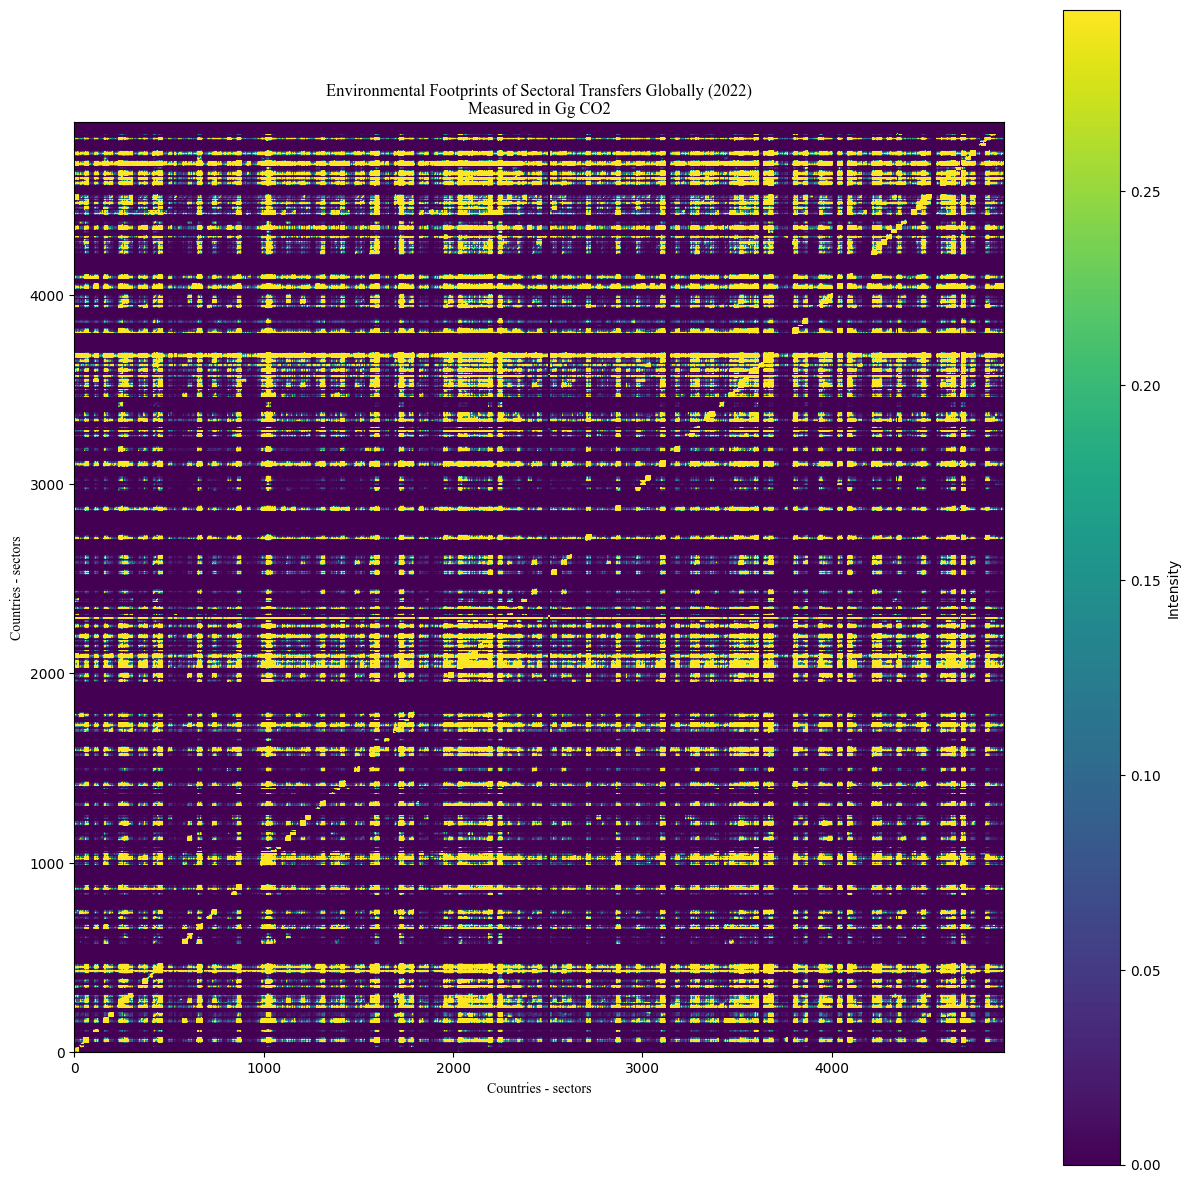

In [42]:
# heatmap for environmental footprints (natural GHG, CBA)
plt.figure(figsize=(15, 15))  
carbvalues = eora26.et1_diag.D_cba.values
vmax = np.percentile(carbvalues[~np.isnan(carbvalues)], 95)
vmin = np.percentile(carbvalues[~np.isnan(carbvalues)], 5)  # Changed to 5th percentile

plt.imshow(carbvalues, vmin=vmin, vmax=vmax, cmap='viridis', origin = 'lower')
plt.xlabel("Countries - sectors", fontname='Times New Roman')
plt.ylabel("Countries - sectors", fontname='Times New Roman')
plt.title("Environmental Footprints of Sectoral Transfers Globally (2022)\nMeasured in Gg CO2", fontname = 'Times New Roman')
plt.colorbar(label='Intensity')
plt.show()

In [18]:
eora26.et1_diag.D_cba.sum(axis=0)

region  sector                              
AFG     Agriculture                              264.623275
        Fishing                                   19.288226
        Mining and Quarrying                      59.544034
        Food & Beverages                         877.833988
        Textiles and Wearing Apparel            1409.813870
                                                   ...     
ZWE     Public Administration                      8.594606
        Education, Health and Other Services     120.760691
        Private Households                         8.900329
        Others                                   117.806447
        Re-export & Re-import                    368.387600
Length: 4914, dtype: float64

In [25]:
eora26.et1_diag.D_cba.sum(axis=0).sum()

np.float64(92026029.58213952)

In [22]:
# extract the relevant rows and columns in the MRIO corresponding to broadband projects (from production).
broadband_sectors = ['Post and Telecommunications', 'Electrical and Machinery',  'Construction',  'Transport',  'Finacial Intermediation and Business Activities']  
sectors_num = [19,8,13,18,20]
io_table_secs = io_table.loc[(slice(None), broadband_sectors), (slice(None), broadband_sectors)]
fd_table_sectors = fd_table.loc[(slice(None), broadband_sectors), :]

In [24]:
summed = sum([eora26.et1_diag.D_cba.sum(axis=0)[i] for i in sectors_num])
print(summed)

12003.421119334052


In [43]:
# Define the carbon tax scenario
carbon_tax = 23 / 0.0001  # $ per Gg CO2

# Calculate the carbon tax revenue
carbon_tax_revenue = summed * carbon_tax

# Apply the carbon tax to the MRIO model
fd_table_carbon_tax = fd_table.copy()
for sector in broadband_sectors:
    fd_table_carbon_tax.loc[(slice(None), sector), :] *= (1 - carbon_tax / 100)

# Recalculate the environmental impacts
eora26.calc_all(Y=fd_table_carbon_tax)
eora26.et1_diag.D_cba.head(20)
summed_carbon_tax = sum([eora26.et1_diag.D_cba.sum(axis=0)[i] for i in sectors_num])

# Compare the results
print("Total environmental impact without carbon tax:", summed)
print("Total environmental impact with carbon tax:", summed_carbon_tax)
print("Reduction in environmental impact due to carbon tax:", summed - summed_carbon_tax)


TypeError: IOSystem.calc_all() got an unexpected keyword argument 'Y'

In [28]:

scenario_matrix = pd.DataFrame({
    'Scenario': ['Baseline', 'Scenario 1', 'Scenario 2'],
    'Abatement Measures': [['None'], ['Building efficiency - new build', 'Renewable energy - solar'], ['Energy efficiency - lighting', 'Green transportation - electric vehicles']],
    'Abatement Potential (GtCO2e/year)': [0, 3, 1.5],
    'Cost (€/tCO2e)': [0, 10, 10]
})

# Define the abatement measures and their corresponding abatement potentials and costs
abatement_measures = {
    'Building efficiency - new build': {'abatement_potential': 2, 'cost': -20},
    'Renewable energy - solar': {'abatement_potential': 1, 'cost': 30},
    'Energy efficiency - lighting': {'abatement_potential': 1, 'cost': -30},
    'Green transportation - electric vehicles': {'abatement_potential': 0.5, 'cost': 40}
}

# Apply scenario analysis to MRIO
for scenario in scenario_matrix['Scenario']:
    # Modify final demand vector (Y) to reflect abatement measures
    Y_scenario = eora26.Y.copy()
    for measure in scenario_matrix.loc[scenario_matrix['Scenario'] == scenario, 'Abatement Measures'].values[0]:
        # Apply abatement measure to final demand vector
        Y_scenario = apply_abatement_measure(Y_scenario, measure, abatement_measures[measure]['abatement_potential'])
    
    # Calculate resulting environmental impacts
    eora26.calc_all(Y=Y_scenario)
    environmental_impacts_scenario = eora26.et1_diag.D_cba.sum(axis=0).sum()
    
    # Print results
    print(f'Scenario: {scenario}')
    print(f'Environmental Impacts: {environmental_impacts_scenario}')

# Evaluate policy effectiveness
policy_effectiveness = pd.DataFrame({
    'Scenario': scenario_matrix['Scenario'],
    'Environmental Impacts': [environmental_impacts_scenario for scenario in scenario_matrix['Scenario']]
})

# Print results
print(policy_effectiveness)


NameError: name 'pd' is not defined

In [ ]:
np.savetxt('io_table.csv', io_table, delimiter=',')  
np.savetxt('fd_table.csv', fd_table, delimiter=',')  
np.savetxt('leontief_inverse.csv', leontief_inverse, delimiter=',')  
#np.savetxt('carbon_footprint_df.csv', carbon_footprint_df, delimiter=',')